# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Set path

In [2]:
path = r'/Users/aibee/Desktop/CareerFoundry/4. Python Fundamentals for Data Analysts/24-05-2022 Instacart Basket Analysis'

# 3. Import Data

In [3]:
#import data
df_complete_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
#check the output
df_complete_data.shape

(32404859, 32)

In [5]:
df_complete_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,no_of_dependents,marital_status,income,max_order,loyalty_flag,avg_price,spender_flag,median_order_duration,frequency_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


# 3. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

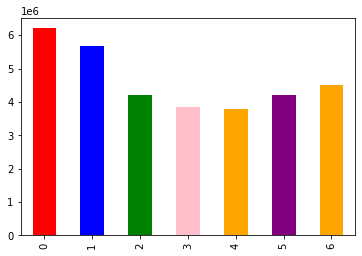

In [6]:
# bar chart
bar = df_complete_data['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

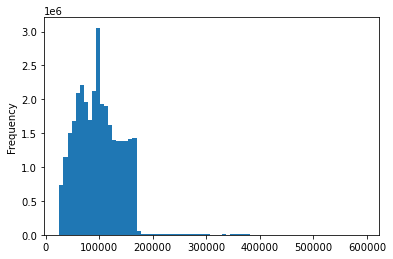

In [7]:
# histogram
hist = df_complete_data['income'].plot.hist(bins=75)

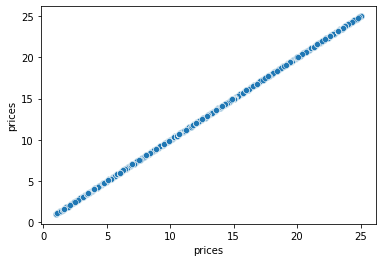

In [8]:
#scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df_complete_data)

In [9]:
# define the sub set of the df for the line chart (plotting the top 1 million)
# creating a random sampling
np.random.seed(4)

In [10]:
dev = np.random.rand(len(df_complete_data)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
#splitting the dataframe (70% of the sample in the dataframe)
big = df_complete_data[dev]

In [13]:
#splitting the dataframe (30% of the sample in the dataframe)
small = df_complete_data[~dev]

In [14]:
#checking the execution for accuraccy
len(df_complete_data)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
# select the columns needed line plot
df_complete_data2 = small[['orders_day_of_week', 'prices']]

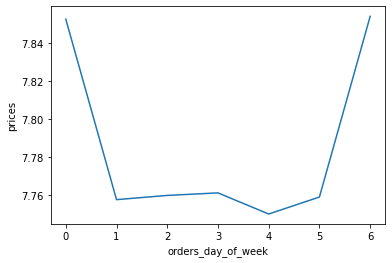

In [17]:
line = sns.lineplot(data = df_complete_data2, x = 'orders_day_of_week',y = 'prices')

# 4. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

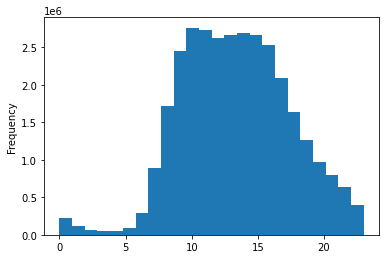

In [18]:
hist_hour = df_complete_data['order_time_of_day'].plot.hist(bins = 24)

## -In a markdown cell beneath your histogram, describe what the histogram demonstrates.
#### The above histogram represents the hours of the day (0 - 23 hour) and the total amount of orders placed for each hour (in millions)


In [19]:
#checking the histogram accuracy
df_complete_data['order_time_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_time_of_day, dtype: int64

# 5. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

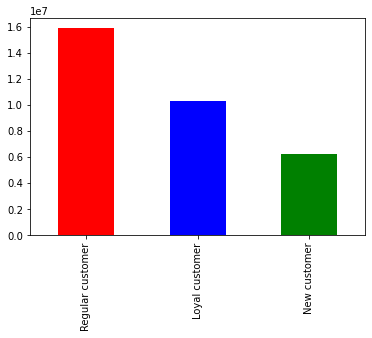

In [22]:
#plotting bar chart for the loyalty flag
loyalty_bar = df_complete_data['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [21]:
#df_complete_data.info()

# 6. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
#using the earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_time_of_day', 'prices']]

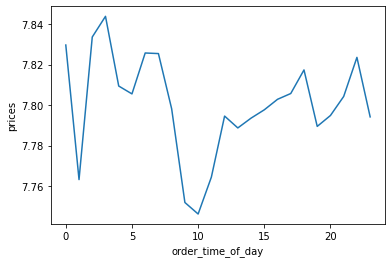

In [26]:
# Create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_time_of_day', y = 'prices')

# 7. Determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [27]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small [['no_of_dependents', 'age']]

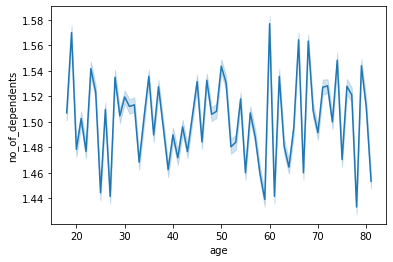

In [28]:
#create line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'age', y = 'no_of_dependents')

#### The line chart shows the relationship between customer's age and the number of dependents in each family. However, the line does show a distinct relationship between age of instacart customers and the number of dependents. 

# 8. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [29]:
#using the earlier splitted data of 30% and selecting the right columns
df_income_age = small [['income', 'age']]

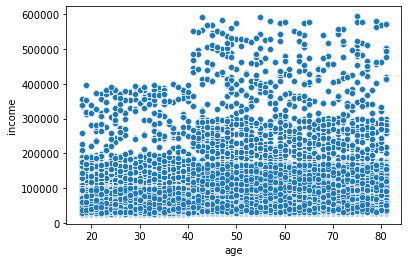

In [30]:
#create scatter plot
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

#### The scatterplot shows the relationship between between age and income of instacart customers. Some facts are explitcit from the plot :
##### 1. There are massive concetration of customers across all ages that earns up to 200,000 USD.
##### 2. Customers 40 years and olders are earning more  (up to 600,000 USD).
##### 3. Therefore, in can be concluded that instacart customers 40 years and above have ability to spend more base on their higher income earnings.

# 9. Export your visualizations as “.png” files in your relevant project folder.

In [31]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_4_9.png'))

In [32]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_4_9.png'))

In [33]:
splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'splot_4_9.png'))

In [34]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_4_9.png'))

In [35]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_4_9.png'))

In [38]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar_4_9.png'))

In [39]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hour_4_9.png'))

In [40]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_deps_4_9.png'))

In [41]:
plot_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_spending_power_4_9.png'))